In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("spam_Emails_data.csv", sep = ',')

In [3]:
data.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [5]:
data.isnull().sum()

label    0
text     2
dtype: int64

In [6]:
data = data.dropna(subset = ['label', 'text']).reset_index(drop = True)

In [7]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
data['text'] = data['text'].str.lower()

data['label'] = LabelEncoder().fit_transform(data['label'])

In [10]:
X = data['text']
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB

vectorizer = CountVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# MultinomialNB

In [13]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, Y_train)

y_pred = classifier.predict(X_test_vectorized)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

accuracy = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

In [26]:
print(f"Accuracy: {accuracy}")

print(f"Confusion Matrix:")
print(cm)

print(f"Classification Report:")
print(report)

Accuracy: 0.962754707247872
Confusion Matrix:
[[20235   295]
 [ 1149 17091]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20530
           1       0.98      0.94      0.96     18240

    accuracy                           0.96     38770
   macro avg       0.96      0.96      0.96     38770
weighted avg       0.96      0.96      0.96     38770



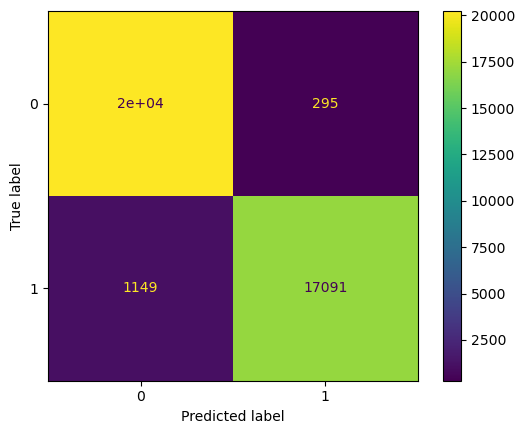

In [27]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

# BernoulliNB

In [31]:
classifier_bernoulli = BernoulliNB()
classifier_bernoulli.fit(X_train_vectorized, Y_train)

y_pred_bernoulli = classifier_bernoulli.predict(X_test_vectorized)

accuracy_bernoulli = accuracy_score(Y_test, y_pred_bernoulli)
confusion_matrix_bernoulli = confusion_matrix(Y_test, y_pred_bernoulli)
report_bernoulli = classification_report(Y_test, y_pred_bernoulli)

print(f"Accuracy: {accuracy_bernoulli}")

print(f"Confusion Matrix:")
print(confusion_matrix_bernoulli)

print(f"Classification Report:")
print(report_bernoulli)

Accuracy: 0.8890895021924168
Confusion Matrix:
[[17090  3440]
 [  860 17380]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     20530
           1       0.83      0.95      0.89     18240

    accuracy                           0.89     38770
   macro avg       0.89      0.89      0.89     38770
weighted avg       0.90      0.89      0.89     38770



# ComplementNB

In [34]:
classifier_complement = ComplementNB()
classifier_complement.fit(X_train_vectorized, Y_train)

y_pred_complement = classifier_complement.predict(X_test_vectorized)

accuracy_complement = accuracy_score(Y_test, y_pred_complement)
confusion_matrix_complement = confusion_matrix(Y_test, y_pred_complement)
report_complement = classification_report(Y_test, y_pred_complement)

print(f"Accuracy: {accuracy_complement}")

print(f"Confusion Matrix:")
print(confusion_matrix_complement)

print(f"Classification Report:")
print(report_complement)

Accuracy: 0.9627805003868971
Confusion Matrix:
[[20226   304]
 [ 1139 17101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20530
           1       0.98      0.94      0.96     18240

    accuracy                           0.96     38770
   macro avg       0.96      0.96      0.96     38770
weighted avg       0.96      0.96      0.96     38770

